In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [27]:
x=df.iloc[:,1:31]
x.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [28]:
Diagnosis=pd.get_dummies(x["diagnosis"],drop_first=True,dtype=int)
Diagnosis

,M
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [29]:
##Concatenate the dataFrames
x=pd.concat([x,Diagnosis],axis=1)
##Drop Unnecessary columns

x=x.drop(['diagnosis'],axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,1


In [30]:
y=df.iloc[:,30]

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [32]:
#Feature scaling to reduce the time for calculation of weights(Derivatives)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyReLU,PReLU,ELU
#from keras.layers import Dropout

In [34]:
#initialising ANN
classifier = Sequential()


classifier.add(Dense(6,  kernel_initializer= 'he_uniform',activation='relu',input_dim = 30))

In [35]:
#adding second hidden layer
classifier.add(Dense(6,  kernel_initializer= 'he_uniform',activation='relu'))

#adding output layer

classifier.add(Dense(1,   kernel_initializer='glorot_uniform',activation='sigmoid'))

In [36]:
#compling ANN
classifier.compile(optimizer='Adamax',loss="binary_crossentropy",metrics=['accuracy'])

In [37]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33, batch_size=10, epochs = 10)

Epoch 1/10
31/31 [==============================] - 0s 5ms/step - loss: 0.9175 - accuracy: 0.0000e+00 - val_loss: 0.8180 - val_accuracy: 0.0000e+00
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 0.7947 - accuracy: 0.0000e+00 - val_loss: 0.7612 - val_accuracy: 0.0000e+00
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.7391 - accuracy: 0.0000e+00 - val_loss: 0.7366 - val_accuracy: 0.0000e+00
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 0.7114 - accuracy: 0.0000e+00 - val_loss: 0.7204 - val_accuracy: 0.0000e+00
Epoch 5/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.0000e+00 - val_loss: 0.7069 - val_accuracy: 0.0000e+00
Epoch 6/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.0000e+00 - val_loss: 0.6964 - val_accuracy: 0.0000e+00
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.0000e+00 - val_loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


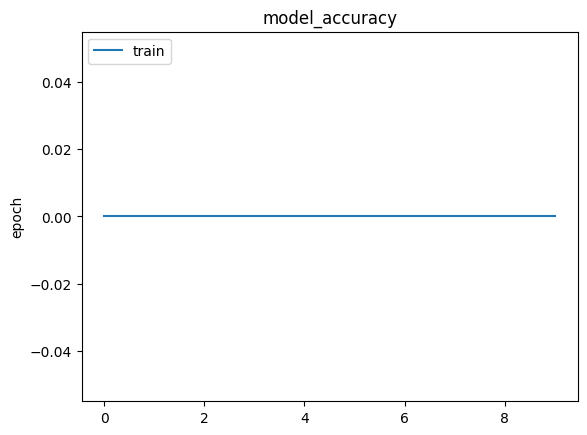

In [38]:
#list all data in history
print(model_history.history.keys())
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()